# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [8]:
import pandas as pd

data = pd.read_csv('data/Bryant et al 2010.csv')

data

# LHS sampling
# 1000 points experimental design



FileNotFoundError: [Errno 2] No such file or directory: '../data/Bryant et al 2010.csv'

In [2]:
from ema_workbench.analysis import prim

# 9 uncertainties = columns 2-10
x = data.iloc[:, 2:11]

# results =  column 15
y = data.iloc[:, 15]

# assigns a value of unity for cases whose costs fall above the 90th percentile (threshold = 0.9?) and zero otherwise,

prim_alg = prim.Prim(x, y, threshold=0.9, peel_alpha=0.1)
boxA = prim_alg.find_box()

NameError: name 'data' is not defined

In [1]:
type(y)

NameError: name 'y' is not defined

coverage    0.730337
density     0.833333
id                22
mass        0.088435
mean        0.833333
res_dim            4
Name: 22, dtype: object

                            box 22                                           
                               min         max                      qp values
Total biomass           450.000000  755.799988  [-1.0, 3.975269312730579e-06]
Demand elasticity        -0.422000   -0.202000  [5.677298162579917e-18, -1.0]
Biomass backstop price  155.550003  199.600006   [7.74627840480414e-14, -1.0]
Cellulosic cost          72.650002  133.699997     [0.1039150022362067, -1.0]



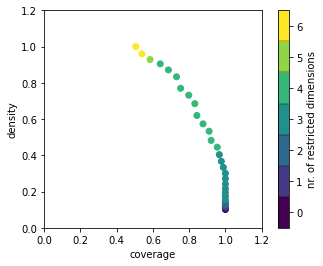

In [6]:
boxA.show_tradeoff()
boxA.inspect(22)

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [ ]:
data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
r1 = outcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outocmes[y3] < t3
rc = r1 or (r2 or r3)

